# BIOS 512 FINAL PROJECT 
**TAYLOR WILLIAMS**


Data Description: [Chocolate Bar Reviews](https://github.com/rfordatascience/tidytuesday/blob/master/data/2022/2022-01-18/readme.md)

# Table of Contents
     * Packages and Data
     * Visualization 1: Bar Graph
     * Visualization 2: Scatterplot
     * Visualization 3: Table
     * Analysis Description

# Packages and Data

In [1]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
chocolate <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-01-18/chocolate.csv')


Rows: 2530 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): company_manufacturer, company_location, country_of_bean_origin, spe...
dbl (3): ref, review_date, rating

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Installed in the terminal: 
- mamba install -c conda-forge r-gganimate
- mamba install -c conda-forge r-gifski
- mamba install -c conda-forge r-gapminder


In [3]:
library('gganimate')

In [4]:
display_gif = function(gganim, ...){
    
    raw = suppressMessages(animate(gganim, ...))
    
    contents = base64enc::base64encode(raw)
    tag = '<img src="data:image/gif;base64,%s">'
    
    IRdisplay::display_html(sprintf(tag, contents))
    
}

# Visualization 1: Bar Graph

In [5]:
chocolate2 = chocolate |>
    group_by(country_of_bean_origin) |> 
    mutate(beancountry = n()) |>
    ungroup() |>
    arrange(desc(country_of_bean_origin)) |>
    mutate(country_of_bean_origin = country_of_bean_origin |> fct_lump(n=10) |> fct_infreq()) |>
    filter(country_of_bean_origin != "Other")


chocolate2 |> head()

ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating,beancountry
<dbl>,<chr>,<chr>,<dbl>,<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>
2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00,253
1015,A. Morin,France,2013,Venezuela,Chuao,70%,"4- B,S,C,L","oily, nut, caramel, raspberry",4.00,253
1315,A. Morin,France,2014,Venezuela,"Carenero, Criollo",70%,"4- B,S,C,L","harsh, leather, earthy",2.75,253
1315,A. Morin,France,2014,Venezuela,"Sur del Lago, Criollo",70%,"4- B,S,C,L","nutty, mild choco, roasty",3.50,253
1319,A. Morin,France,2014,Venezuela,"Puerto Cabello, Criollo",70%,"4- B,S,C,L","astringent, nutty, chocolatey",3.75,253
2206,A. Morin,France,2018,Venezuela,Porcelana,70%,"4- B,S,C,L","alluring aroma, powdery,nutty",3.50,253


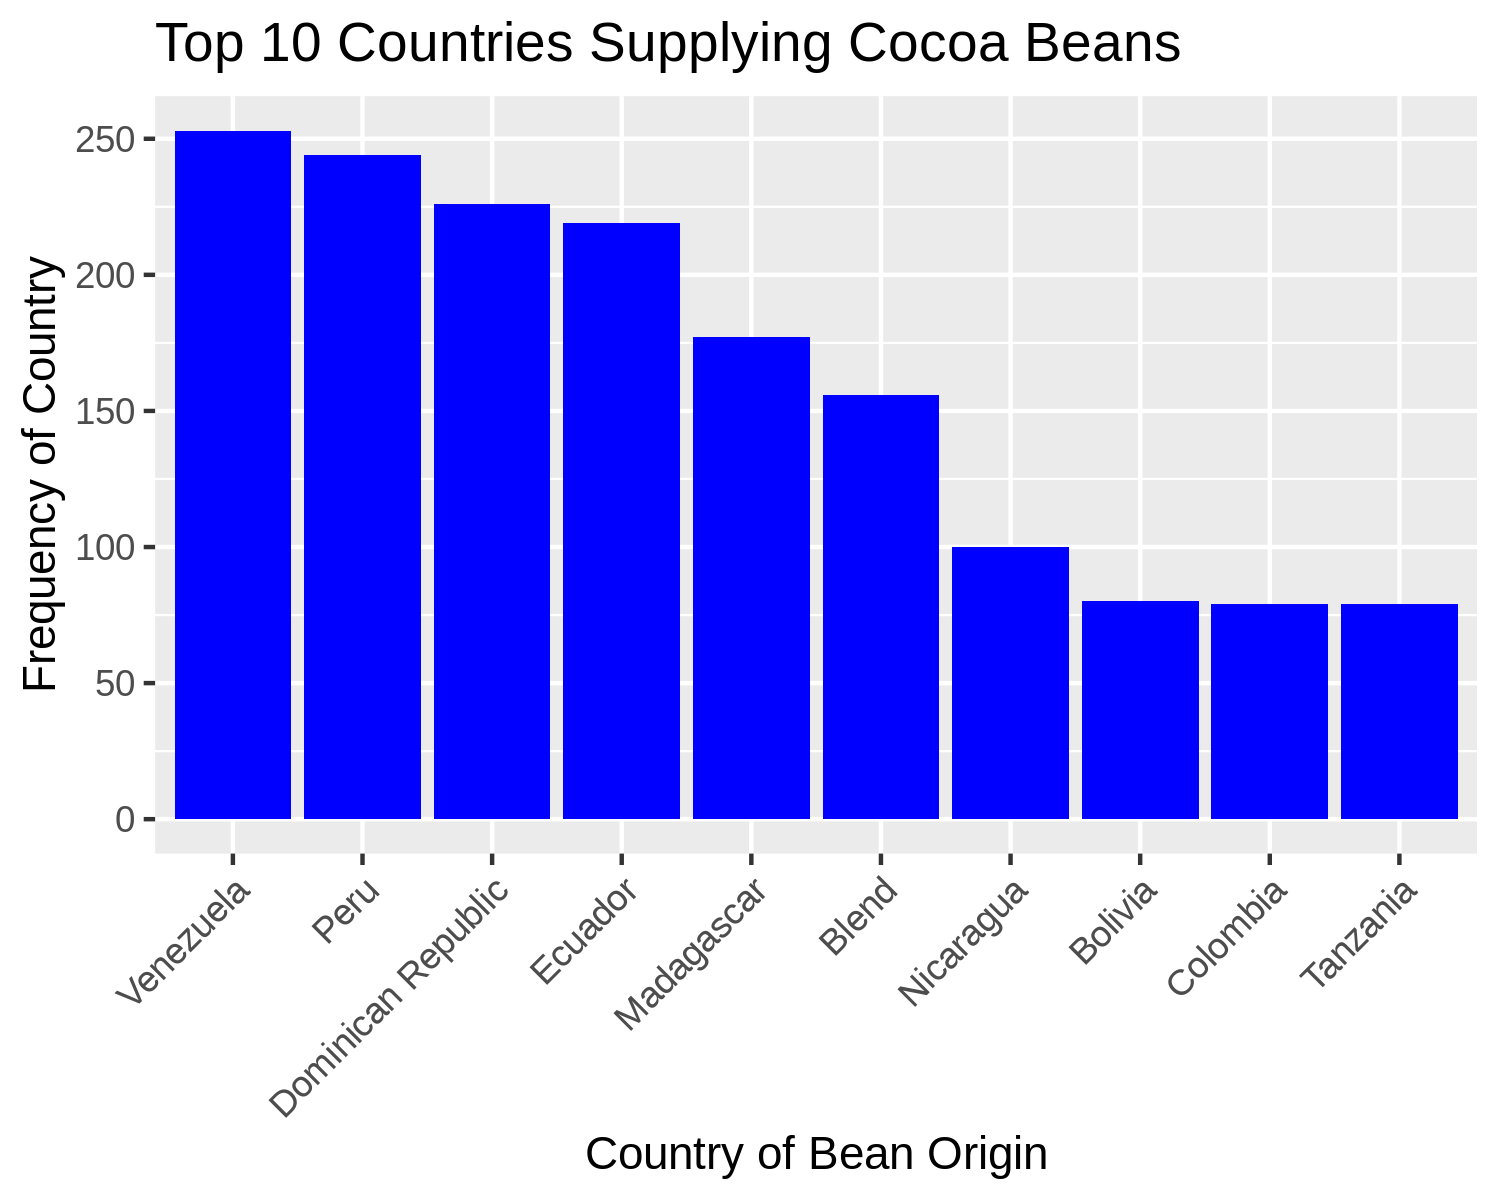

In [6]:
p = ggplot(chocolate2, aes(x = country_of_bean_origin)) +
    geom_bar(fill = 'blue') + 
    labs(x = 'Country of Bean Origin', y = 'Frequency of Country', title = 'Top 10 Countries Supplying Cocoa Beans') + 
    theme(axis.text.x = element_text(angle = 45, hjust=1))
p

# Visualization 2: Scatterplot

In [7]:
chocolate3 = chocolate |>
    filter(country_of_bean_origin == 'Venezuela') |>
    group_by(company_location) |>
    mutate(ncompany_location = n()) |>
    ungroup() |>
    arrange(desc(ncompany_location)) |>
    mutate(company_location = company_location |> fct_lump(n=9, ties.method = 'first') |> fct_infreq()) |>
    mutate(percent = parse_number(cocoa_percent))

chocolate3 |> head()

ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating,ncompany_location,percent
<dbl>,<chr>,<fct>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>
2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00,87,72
1125,Altus aka Cao Artisan,U.S.A.,2013,Venezuela,Sur del Lago,60%,"4- B,S,C,L","sweet, moldy, off",2.50,87,60
147,Amano,U.S.A.,2007,Venezuela,Cuyagua,70%,"4- B,S,C,V","waxy, nutty, mint",3.00,87,70
175,Amano,U.S.A.,2007,Venezuela,Ocumare,70%,"4- B,S,C,V","spicy, strawberry",3.75,87,70
363,Amano,U.S.A.,2009,Venezuela,Montanya,70%,"4- B,S,C,V","hot spice, roasty",3.00,87,70
544,Amano,U.S.A.,2010,Venezuela,Chuao,70%,"4- B,S,C,V","woody, red berry, sour",3.00,87,70


In [8]:
chocolate3 |> pull(company_location) |> levels()

[1] "U.S.A."      "Other"       "Venezuela"   "France"      "Italy"      
 [6] "Canada"      "Switzerland" "U.K."        "Germany"     "Hungary"


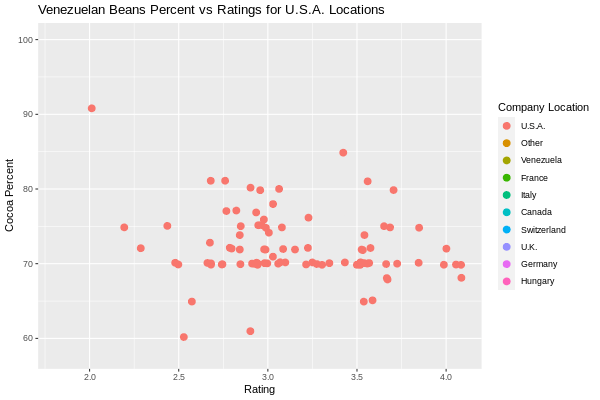

In [9]:
anim = ggplot(chocolate3, aes(x = rating, y = percent, color = company_location)) + 
    geom_point(size = 3, position = position_jitter()) + 
    transition_states(company_location) +
    ggtitle('Venezuelan Beans Percent vs Ratings for {closest_state} Locations') +
    labs(x = 'Rating', y = 'Cocoa Percent', color = 'Company Location') 
    
    

display_gif(anim, w = 600, h = 400)

# Visualization 3: Table

In [10]:
chocotable = chocolate |>
    mutate(percent = parse_number(cocoa_percent)) |>
    group_by(country_of_bean_origin) |>
    mutate(n = n()) |>
    filter(n > 20) |>
    summarize(avgrating = mean(rating), avgpercent = mean(percent)) |>
    arrange(desc(avgrating))


chocotable |> head(30)

country_of_bean_origin,avgrating,avgpercent
<chr>,<dbl>,<dbl>
Vietnam,3.287671,72.35616
Papua New Guinea,3.280000,70.68000
Madagascar,3.266949,71.23729
Haiti,3.266667,70.96667
Brazil,3.262821,71.38462
Guatemala,3.258065,71.54839
Nicaragua,3.255000,71.42000
Trinidad,3.244048,71.76190
U.S.A.,3.242424,69.24242


# Analysis Description

   For the first vizualiation, my goal was to determine the which country supplied the most cocoa beans. I first used `group_by()` for the country of bean origin and then created a column to count the number of reviews for each country using `mutate()`. Then I ungrouped to `arrange()` the data in descending order according to the country of bean origin. Because there were a large number of countries I took the top  10 countries using `fct_lump()` and for aesthetic reasons, I excluded the "Other" category all together. For the graph, I chose `geom_bar()` to display the data, with Country of Bean Origin on the x-axis. I adjusted the angle of the countries using `element_text()`because I was unable to read them with the default settings.

   Because Venezuela was the biggest supplier of cocoa beans, I decided to focus on this country and look at the chocolate bar ratings against their cocoa percents. I used `filter()` to only include Venezuela as the country of bean origin. To see if there were any trends among company locations, I grouped by company location the same way I grouped the country of bean origin in the first visualization. However for the company location I decided to lump the top 9 countries. Cocoa percent was read as a character so I had to change it to be read as an integer in order for it to be included in a scatterplot. I did this with `parse_number()` and created a new column called 'percent'. For the graph, I used `gganim` to create an animation that showed each Company Location individually. 
   
   For the final table, I wanted to compare the average ratings of the country of bean origins as well as look at their average cocoa percents. I first had to make the cocoa percent be read as a integer again. I grouped by country of bean origin and created a column to count the number of reviews for each country using `mutate()`. I only wanted to include countries in my analysis that had at least 20 reviews so used `filter()` to . Then I summarized the data by calculating the average rating of each country and average cocoa percent of each country. To determine the countries with the highest ratings I use `arrange()` and made it display in descending order. (I was surprised to see that Venezuela was not in the top 10 for highest ratings)